### **Numeric Attributes Analysis**

In [5]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("adult.csv")
df.head()

Saving adult.csv to adult (1).csv


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### **Choosing Numeric Attributes**

In [2]:
numeric_cols = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]
numeric_cols

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

### **Five-number summary & descriptive stats**

In [3]:
summary_stats = df[numeric_cols].describe()
print("Five-number summary & descriptive stats:\n", summary_stats)

Five-number summary & descriptive stats:
                 age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


**Interpretation:**  
- **Age:** min = 17, Q1 = 28, median = 37, Q3 = 48, max = 90. Most individuals are between 28–48 years old.  
- **Hours-per-week:** min = 1, Q1 = 40, median = 40, Q3 = 45, max = 99. Most people work full-time (40 hrs), but there are extreme outliers.  
- **Education-num:** ranges from 1 to 16, with most values between 9–13 (high school to some college).  
- **Capital-gain / Capital-loss:** almost all values are 0, with a few very high outliers.  
- **fnlwgt:** very large spread due to census weighting.  

### **Mode for each numeric attribute**

In [4]:
mode_values = df[numeric_cols].mode().iloc[0]
print("Mode values:\n", mode_values)

Mode values:
 age                   36.0
fnlwgt            123011.0
education.num          9.0
capital.gain           0.0
capital.loss           0.0
hours.per.week        40.0
Name: 0, dtype: float64


**Interpretation:**  
The most frequent values reflect common patterns in the dataset:  
- **Age:** 36 is the most frequent.  
- **Hours-per-week:** 40 is the most common, confirming that standard full-time work is typical.  
- **Education-num:** 9 (HS-grad) is most frequent.  
- **Capital-gain / Capital-loss:** both have a mode of 0, meaning the vast majority report no gains or losses.  

### **Variance of numeric attributes**

In [5]:
variance = df[numeric_cols].var(numeric_only=True)
print("Variance:\n", variance)

Variance:
 age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.524590e+02
dtype: float64


**Interpretation:**  
- **fnlwgt** has the highest variance, which makes sense since it’s a census sampling weight.  
- **Capital-gain / Capital-loss** also have high variance because of a few extreme values, even though most are 0.  
- **Age** and **hours-per-week** have moderate variance, showing real-world diversity in working patterns and ages.  

### **Plots (Histogram, Boxplot, Scatter)**

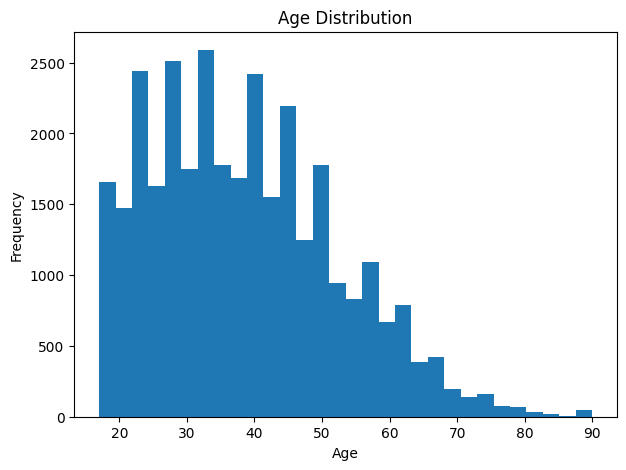

In [6]:
import matplotlib.pyplot as plt

# Histogram: Age
plt.figure(figsize=(7,5))
plt.hist(df["age"].dropna(), bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

- The distribution of `age` is right-skewed. Most individuals are between **20–50 years old**, with relatively few older participants above 70.  

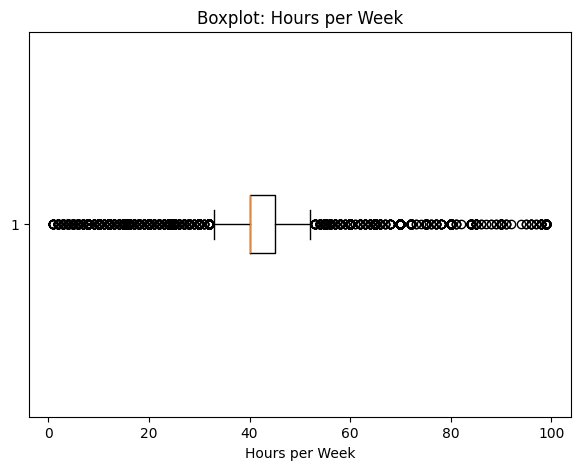

In [7]:
# Boxplot: Hours per Week
plt.figure(figsize=(7,5))
plt.boxplot(df["hours.per.week"].dropna(), vert=False)
plt.title("Boxplot: Hours per Week")
plt.xlabel("Hours per Week")
plt.show()

- The majority of individuals work **around 40 `hours per week`**. However, outliers are present — some report working very low hours (part-time) and others extremely high (up to 99).    

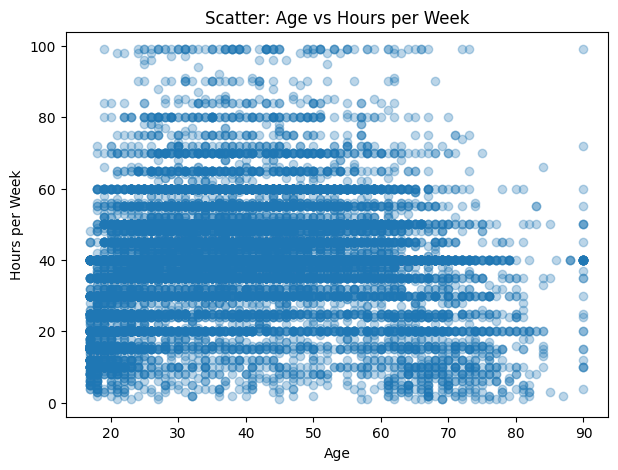

In [8]:
# Scatter: Age vs Hours per Week
plt.figure(figsize=(7,5))
plt.scatter(df["age"], df["hours.per.week"], alpha=0.3)
plt.title("Scatter: Age vs Hours per Week")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.show()

- There is **no strong correlation** between `age` and `hours-per-week`. Most individuals cluster around 20–60 years old working 35–45 hours. Outliers appear as unusual points (e.g., very old age with extreme hours).

In [3]:
# Frequency counts for categorical attributes
categorical_cols = ["workclass", "education", "marital.status",
                    "occupation", "relationship", "race", "sex",
                    "native.country", "income"]

for col in categorical_cols:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts())


Value counts for workclass:

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Value counts for education:

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Value counts for marital.status:

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dt

**Interpretation: Frequency Counts**  
The frequency counts show that some categories dominate the dataset while others are rare.  
- For example, in *workclass*, the majority are in *Private*.  
- In *education*, categories such as *HS-grad* and *Some-college* occur most frequently, while *Preschool* or *Doctorate* are rare.  
- In *sex*, males appear more often than females.  
- For *native-country*, most individuals are from the United States, while other countries occur very few times.  

This confirms that the dataset has **imbalances across categorical attributes**, which must be considered in preprocessing.


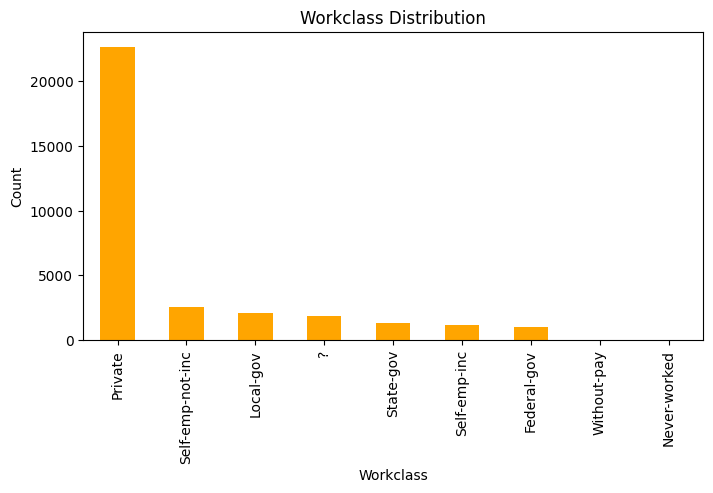

In [7]:
# Bar plot: Workclass
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df["workclass"].value_counts().plot(kind="bar", color="orange")
plt.title("Workclass Distribution")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.show()


**Interpretation: Workclass Distribution**  
Most individuals work in the *Private* sector. Other categories like *Self-emp-not-inc* and *Local-gov* are less common, while *Never-worked* and *Without-pay* are extremely rare.


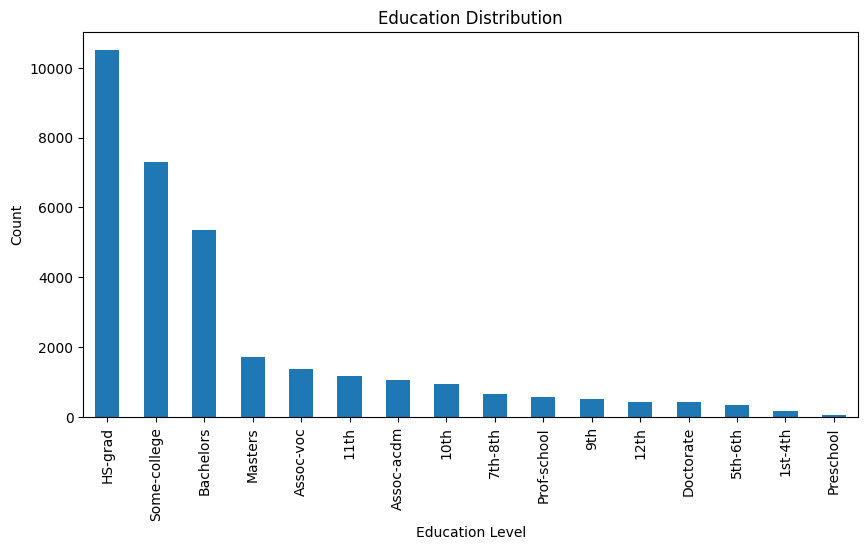

In [9]:

import matplotlib.pyplot as plt

# Bar plot: Education
plt.figure(figsize=(10,5))
df["education"].value_counts().plot(kind="bar")
plt.title("Education Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()


**Interpretation: Education Distribution**  
The plot shows that most individuals fall into the categories *HS-grad*, *Some-college*, and *Bachelors*. Rare categories like *Preschool* and *Doctorate* appear very few times, indicating imbalance in education levels.


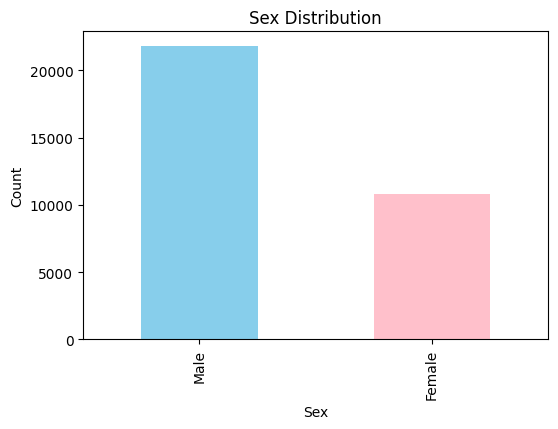

In [12]:
# Bar plot: Sex
plt.figure(figsize=(6,4))
df["sex"].value_counts().plot(kind="bar", color=["skyblue", "pink"])
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


**Interpretation: Sex Distribution**  
The dataset contains more males than females. This imbalance may bias models toward the majority gender.


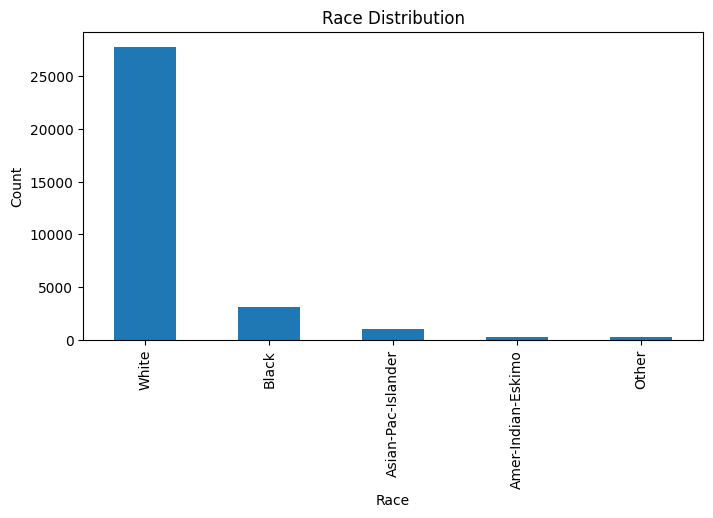

In [13]:
# Bar plot: Race
plt.figure(figsize=(8,4))
df["race"].value_counts().plot(kind="bar")
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()


**Interpretation: Race Distribution**  
The majority of individuals are *White*, followed by *Black*. Other races such as *Asian-Pac-Islander* and *Amer-Indian-Eskimo* appear less frequently, showing race imbalance.


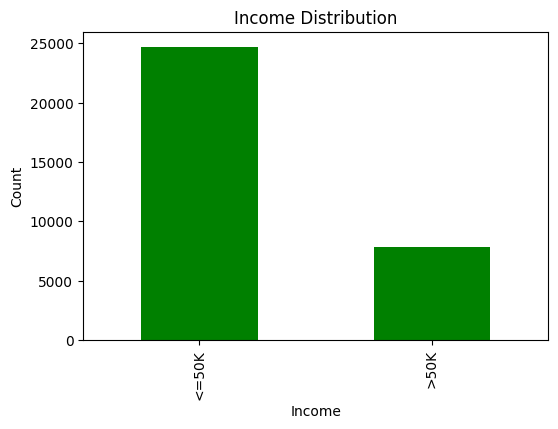

In [14]:
# Class label distribution (Income)
plt.figure(figsize=(6,4))
df["income"].value_counts().plot(kind="bar", color="green")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


**Interpretation: Income Distribution**  
Most individuals have income `<=50K`, while fewer individuals earn `>50K`. This imbalance in the target variable may require preprocessing such as resampling.
